In [1]:
from statistics import mean, stdev, median
from typing import List, Dict

from matplotlib import pyplot as plt

from src.data.processing import (
    GRAVE, ACUTE, TILDE,
    load_texts,
    remove_non_alphabetic_characters,
)
from src.data.vocab import Vocab
from src.paths import DATA_DIR

In [2]:
def sort_vocab_freq(vocab: Vocab) -> Dict:
    return dict(sorted(vocab.token_freq.items(), key=lambda item: item[1], reverse=True))


def summary(texts: List[str]) -> None:
    vocab = Vocab.init_from_texts(texts)

    word_counts = [len(remove_non_alphabetic_characters(text).split()) for text in texts]
    character_counts = [len(text) for text in texts]

    num_grave = vocab.token_freq[GRAVE]
    num_acute = vocab.token_freq[ACUTE]
    num_tilde = vocab.token_freq[TILDE]
    num_accent_marks = num_grave + num_acute + num_tilde

    print(f"""
    Word statistics:
        Total:  {sum(word_counts):>10}
        Mean:   {mean(word_counts) if len(word_counts) > 0 else 0:>10.2f}
        STD:    {stdev(word_counts) if len(word_counts) > 1 else 0:>10.2f}
        Median: {median(word_counts) if len(word_counts) > 0 else 0:>10.2f}
        Min:    {min(word_counts) if len(word_counts) > 0 else 0:>10}
        Max:    {max(word_counts) if len(word_counts) > 0 else 0:>10}

    Character statistics:
        Total:  {sum(character_counts):>10}
        Mean:   {mean(character_counts) if len(character_counts) > 0 else 0:>10.2f}
        STD:    {stdev(character_counts) if len(character_counts) > 1 else 0:>10.2f}
        Median: {median(character_counts) if len(character_counts) > 0 else 0:>10.2f}
        Min:    {min(character_counts) if len(character_counts) > 0 else 0:>10}
        Max:    {max(character_counts) if len(character_counts) > 0 else 0:>10}

    Stress statistics:
        Total:               {num_accent_marks:>10}
        Grave accent marks:  {num_grave:>10}  {num_grave / num_accent_marks:>10.2%}
        Acute accent marks:  {num_acute:>10}  {num_acute / num_accent_marks:>10.2%}
        Tilde accent marks:  {num_tilde:>10}  {num_tilde / num_accent_marks:>10.2%}

    Vocab size: {len(vocab)}
    Vocab frequencies: {sort_vocab_freq(vocab)}
    """)

    plt.figure(figsize=(10, 6))
    plt.hist(word_counts, bins=30, edgecolor="black", alpha=0.75)
    plt.xlabel("Word Count per Sample")
    plt.ylabel("Frequency")
    plt.title("Distribution of Word Counts")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.hist(character_counts, bins=50, edgecolor="black", alpha=0.75)
    plt.xlabel("Character Count per Sample")
    plt.ylabel("Frequency")
    plt.title("Distribution of Character Counts")
    plt.grid(True)
    plt.show()

In [3]:
train_texts = load_texts(DATA_DIR / "train.txt")
val_texts = load_texts(DATA_DIR / "val.txt")
test_texts = load_texts(DATA_DIR / "test.txt")
all_texts = train_texts + val_texts + test_texts

print(f"""
All samples:        {len(all_texts):>10}
Train samples:      {len(train_texts):>10} {len(train_texts) / len(all_texts):>10.2%}
Val samples:        {len(val_texts):>10} {len(val_texts) / len(all_texts):>10.2%}
Test samples:       {len(test_texts):>10} {len(test_texts) / len(all_texts):>10.2%}
""")


All samples:             56444
Train samples:           45963     81.43%
Val samples:              8178     14.49%
Test samples:             2303      4.08%



ALL DATA SUMMARY

    Word statistics:
        Total:      510289
        Mean:         9.04
        STD:          5.87
        Median:       8.00
        Min:             1
        Max:            31

    Character statistics:
        Total:     4085775
        Mean:        72.39
        STD:         47.50
        Median:      60.00
        Min:             5
        Max:           200

    Stress statistics:
        Total:                   510513
        Grave accent marks:      175475      34.37%
        Acute accent marks:      114157      22.36%
        Tilde accent marks:      220881      43.27%

    Vocab size: 47
    Vocab frequencies: {' ': 474931, 'i': 390576, 'a': 356282, 's': 230600, '̃': 220881, 't': 175487, '̀': 175475, 'e': 161982, 'o': 157343, 'r': 150995, 'k': 146466, 'n': 146342, 'u': 144501, '́': 114157, 'm': 92220, 'l': 87677, 'p': 86725, 'd': 79045, 'v': 70044, 'j': 67855, ',': 62058, 'g': 60654, 'ė': 58974, '.': 49322, 'š': 46676, 'b': 43944, 'y': 35065, 'ž': 301

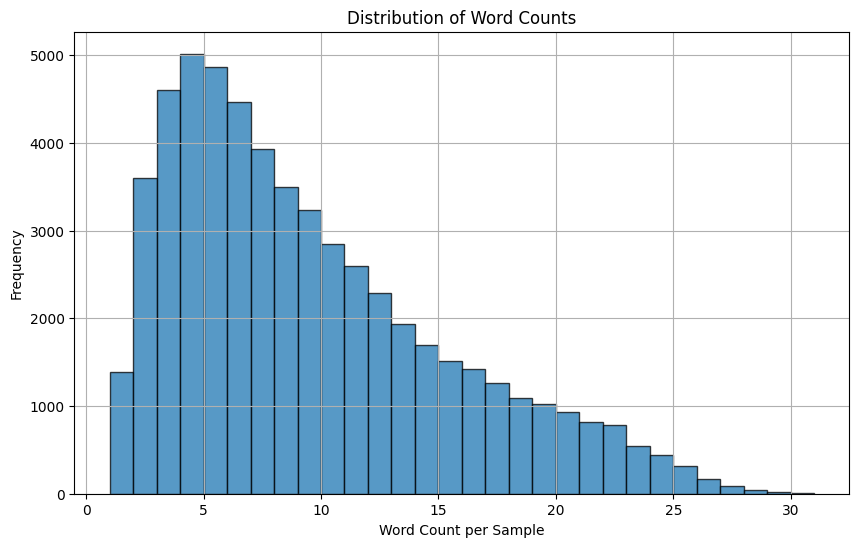

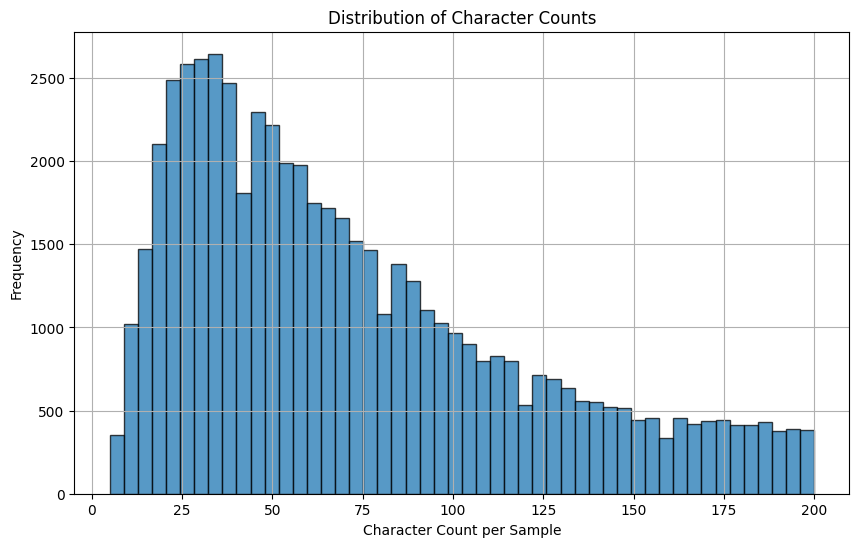

In [4]:
print("ALL DATA SUMMARY")
summary(all_texts)

TRAIN DATA SUMMARY

    Word statistics:
        Total:      413672
        Mean:         9.00
        STD:          5.85
        Median:       8.00
        Min:             1
        Max:            31

    Character statistics:
        Total:     3317336
        Mean:        72.17
        STD:         47.39
        Median:      60.00
        Min:             5
        Max:           200

    Stress statistics:
        Total:                   413872
        Grave accent marks:      143258      34.61%
        Acute accent marks:       92571      22.37%
        Tilde accent marks:      178043      43.02%

    Vocab size: 47
    Vocab frequencies: {' ': 385041, 'i': 317962, 'a': 289216, 's': 187065, '̃': 178043, 't': 143785, '̀': 143258, 'e': 131713, 'o': 128231, 'r': 123135, 'k': 118899, 'n': 118661, 'u': 116492, '́': 92571, 'm': 75424, 'p': 70490, 'l': 70450, 'd': 64151, 'v': 56372, 'j': 55415, ',': 49910, 'g': 49441, 'ė': 47405, '.': 39784, 'š': 37702, 'b': 35664, 'y': 28602, 'ž': 24

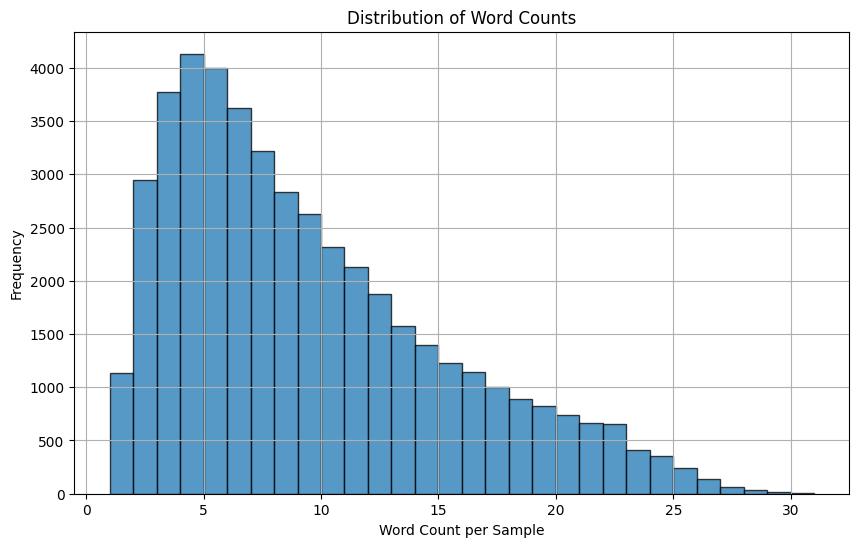

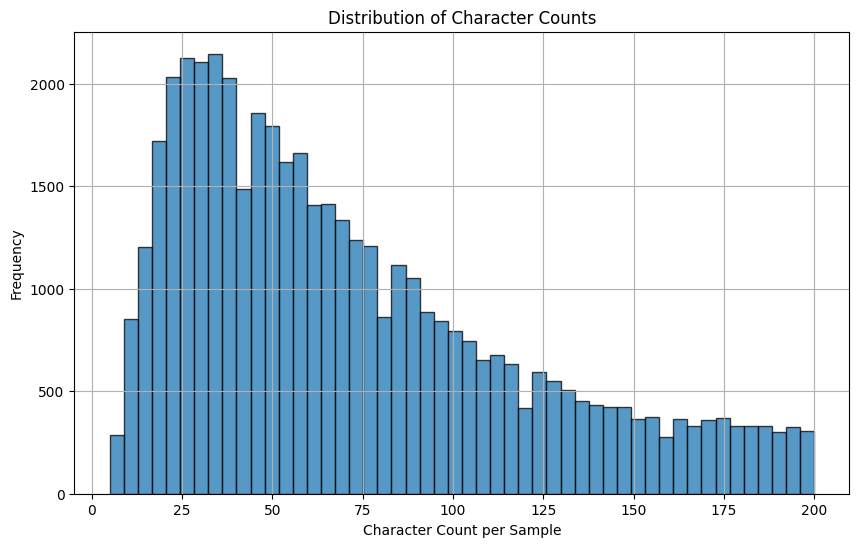

In [5]:
print("TRAIN DATA SUMMARY")
summary(train_texts)

VALIDATION DATA SUMMARY

    Word statistics:
        Total:       73635
        Mean:         9.00
        STD:          5.85
        Median:       8.00
        Min:             1
        Max:            29

    Character statistics:
        Total:      588609
        Mean:        71.97
        STD:         47.28
        Median:      59.00
        Min:             5
        Max:           200

    Stress statistics:
        Total:                    73658
        Grave accent marks:       25207      34.22%
        Acute accent marks:       16385      22.24%
        Tilde accent marks:       32066      43.53%

    Vocab size: 47
    Vocab frequencies: {' ': 68483, 'i': 56107, 'a': 51349, 's': 33133, '̃': 32066, '̀': 25207, 't': 25076, 'e': 23443, 'o': 22649, 'r': 21534, 'n': 21203, 'k': 21030, 'u': 20943, '́': 16385, 'm': 13224, 'l': 12567, 'p': 12559, 'd': 11427, 'v': 10199, 'j': 9812, ',': 8977, 'g': 8624, 'ė': 8558, '.': 7167, 'š': 6851, 'b': 6330, 'y': 5107, 'ž': 4337, 'ų': 3646, '

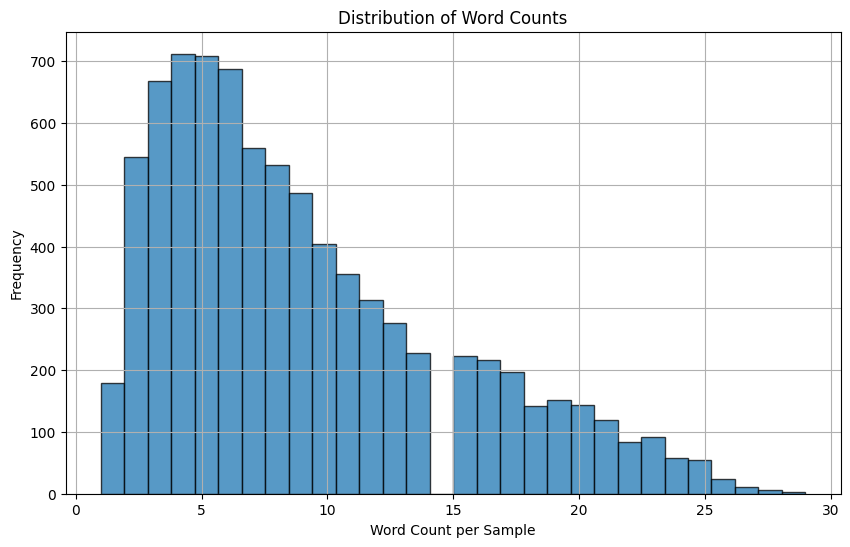

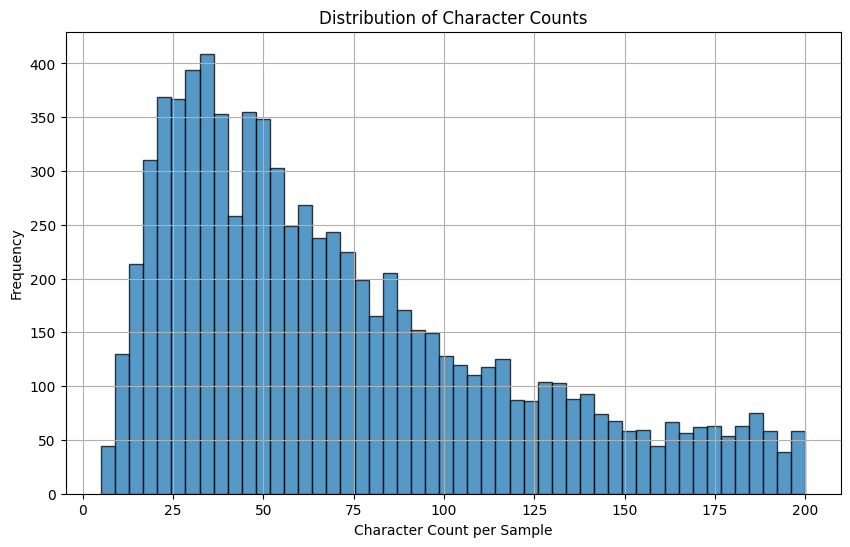

In [6]:
print("VALIDATION DATA SUMMARY")
summary(val_texts)

TEST DATA SUMMARY

    Word statistics:
        Total:       22982
        Mean:         9.98
        STD:          6.37
        Median:       9.00
        Min:             1
        Max:            29

    Character statistics:
        Total:      179830
        Mean:        78.09
        STD:         50.07
        Median:      68.00
        Min:             5
        Max:           200

    Stress statistics:
        Total:                    22983
        Grave accent marks:        7010      30.50%
        Acute accent marks:        5201      22.63%
        Tilde accent marks:       10772      46.87%

    Vocab size: 46
    Vocab frequencies: {' ': 21407, 'i': 16507, 'a': 15717, '̃': 10772, 's': 10402, 'u': 7066, '̀': 7010, 'e': 6826, 't': 6626, 'k': 6537, 'n': 6478, 'o': 6463, 'r': 6326, '́': 5201, 'l': 4660, 'p': 3676, 'm': 3572, 'v': 3473, 'd': 3467, ',': 3171, 'ė': 3011, 'j': 2628, 'g': 2589, '.': 2371, 'š': 2123, 'b': 1950, 'ž': 1740, 'y': 1356, 'ų': 1267, 'ą': 1079, 'į': 843, 

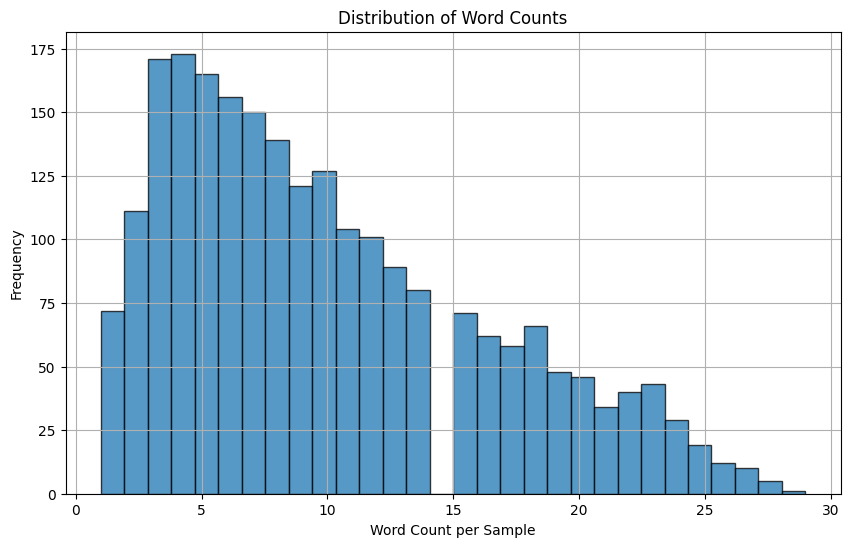

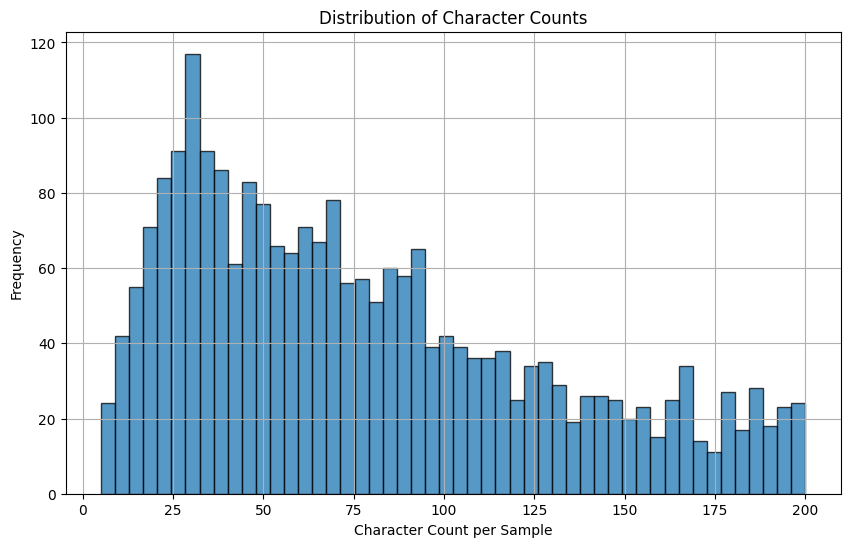

In [7]:
print("TEST DATA SUMMARY")
summary(test_texts)